# # Bussiness Problems

*Develop a classification model to predict the likelihood of heart disease based on patient medical data, enabling early diagnosis and preventive care. This will help healthcare providers improve patient
outcomes and optimize resource allocation.*

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [349]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Understanding

age: Age of the individual.
sex: Sex of the individual (1 = male, 0 = female).
cp: Chest pain type (categorical variable with values 0–3).
trestbps: Resting blood pressure (in mm Hg).
chol: Serum cholesterol (in mg/dl).
fbs: Fasting blood sugar (>120 mg/dl, 1 = true, 0 = false).
restecg: Resting electrocardiographic results (categorical variable).
thalach: Maximum heart rate achieved.
exang: Exercise-induced angina (1 = yes, 0 = no).
oldpeak: ST depression induced by exercise relative to rest.
slope: The slope of the peak exercise ST segment.
ca: Number of major vessels (0–4) colored by fluoroscopy.
thal: Thalassemia (categorical variable).
target: Target variable indicating the presence (1) or absence (0) of heart disease.

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [351]:
df.shape

(1025, 14)

In [352]:
df["age"].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [353]:
df["age"].value_counts

<bound method IndexOpsMixin.value_counts of 0       52
1       53
2       70
3       61
4       62
        ..
1020    59
1021    60
1022    47
1023    50
1024    54
Name: age, Length: 1025, dtype: int64>

In [354]:
df["sex"].unique()

array([1, 0], dtype=int64)

In [355]:
df["sex"].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       0
       ..
1020    1
1021    1
1022    1
1023    0
1024    1
Name: sex, Length: 1025, dtype: int64>

In [356]:
df["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

In [357]:
df["cp"].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [358]:
df["trestbps"].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101], dtype=int64)

In [359]:
df["trestbps"].value_counts()

trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3
164      3
156      3
101      3
Name: count, dtype: int64

In [360]:
df["chol"].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141], dtype=int64)

In [361]:
df["chol"].value_counts()

chol
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: count, Length: 152, dtype: int64

In [362]:
df["fbs"].unique()

array([0, 1], dtype=int64)

In [363]:
df["fbs"].value_counts()

fbs
0    872
1    153
Name: count, dtype: int64

In [364]:
df["restecg"].unique()

array([1, 0, 2], dtype=int64)

In [365]:
df["restecg"].value_counts()

restecg
1    513
0    497
2     15
Name: count, dtype: int64

In [366]:
df["thalach"].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113],
      dtype=int64)

In [367]:
df["thalach"].value_counts()

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

In [368]:
df["exang"].unique()

array([0, 1], dtype=int64)

In [369]:
df["exang"].value_counts()

exang
0    680
1    345
Name: count, dtype: int64

In [370]:
df["oldpeak"].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [371]:
df["oldpeak"].value_counts()

oldpeak
0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: count, dtype: int64

In [372]:
df["oldpeak"].value_counts()

oldpeak
0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: count, dtype: int64

In [373]:
df["slope"].unique()

array([2, 0, 1], dtype=int64)

In [374]:
df["slope"].value_counts()

slope
1    482
2    469
0     74
Name: count, dtype: int64

In [375]:
df["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [376]:
df["ca"].value_counts()

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

In [377]:
df["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

In [378]:
df["thal"].value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [379]:
df["target"].unique()

array([0, 1], dtype=int64)

In [380]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [381]:
df.duplicated().sum()

723

In [382]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [384]:
continous=["age","oldpeak","trestbps","chol","thalach"]
discrit_count=["ca"]
Discrete_categorial=["sex","cp","fbs","restecg","exang","slope","thal"]

# Exploratory Data Analysis(EDA)

### for continous variables

In [385]:
df[continous].describe()

,age,oldpeak,trestbps,chol,thalach
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000
mean,54.434146,1.071512,131.611707,246.00000,149.114146
std,9.072290,1.175053,17.516718,51.59251,23.005724
min,29.000000,0.000000,94.000000,126.00000,71.000000
25%,48.000000,0.000000,120.000000,211.00000,132.000000
50%,56.000000,0.800000,130.000000,240.00000,152.000000
75%,61.000000,1.800000,140.000000,275.00000,166.000000
max,77.000000,6.200000,200.000000,564.00000,202.000000


In [386]:
df[continous].skew()

age        -0.248866
oldpeak     1.210899
trestbps    0.739768
chol        1.074073
thalach    -0.513777
dtype: float64

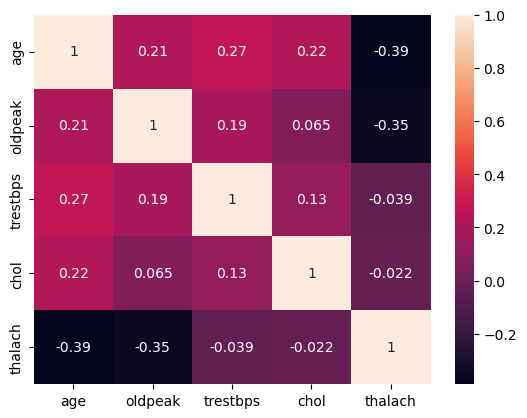

In [387]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

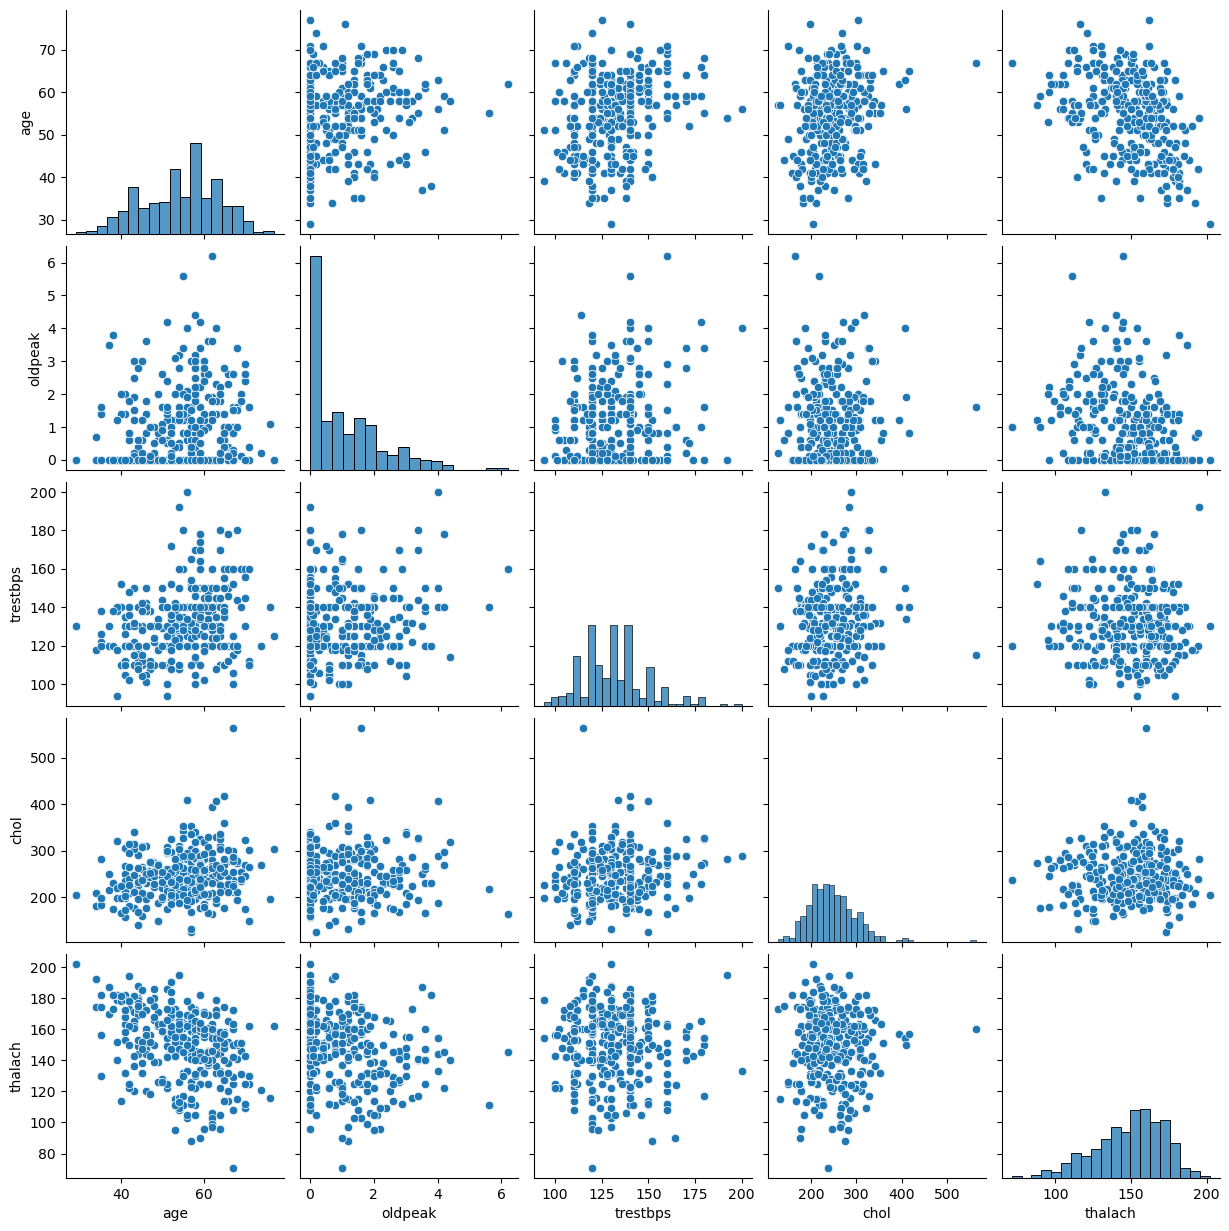

In [388]:
sns.pairplot(df[continous])
plt.show()

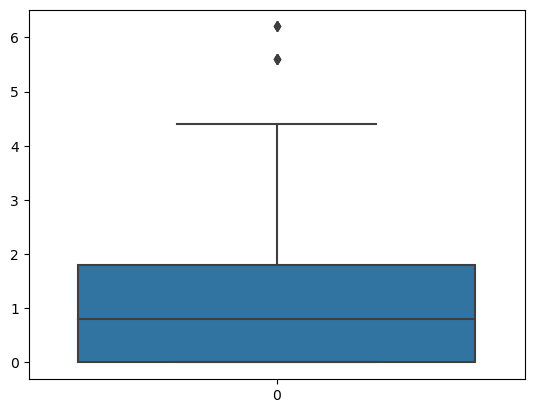

In [389]:
sns.boxplot(df["oldpeak"])
plt.show()

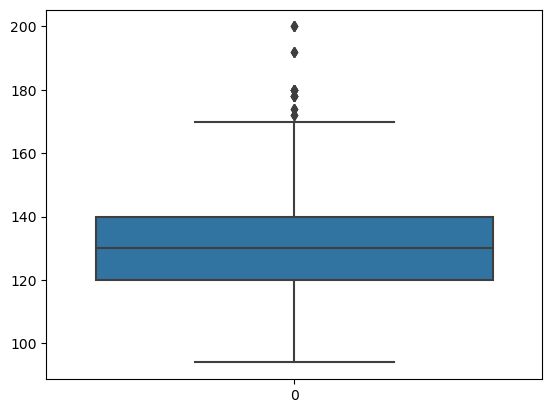

In [390]:
sns.boxplot(df["trestbps"])
plt.show()

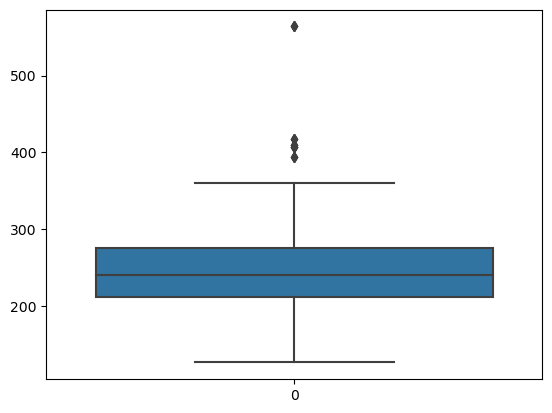

In [391]:
sns.boxplot(df["chol"])
plt.show()

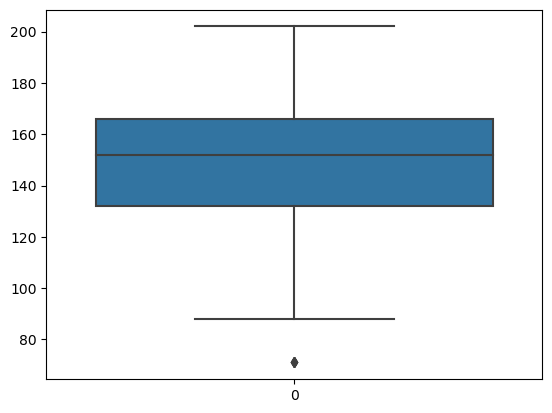

In [392]:
sns.boxplot(df["thalach"])
plt.show()

### for Discrete Variables

In [393]:
df[Discrete_categorial].describe()

,sex,cp,fbs,restecg,exang,slope,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.695610,0.942439,0.149268,0.529756,0.336585,1.385366,2.323902
std,0.460373,1.029641,0.356527,0.527878,0.472772,0.617755,0.620660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,3.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000


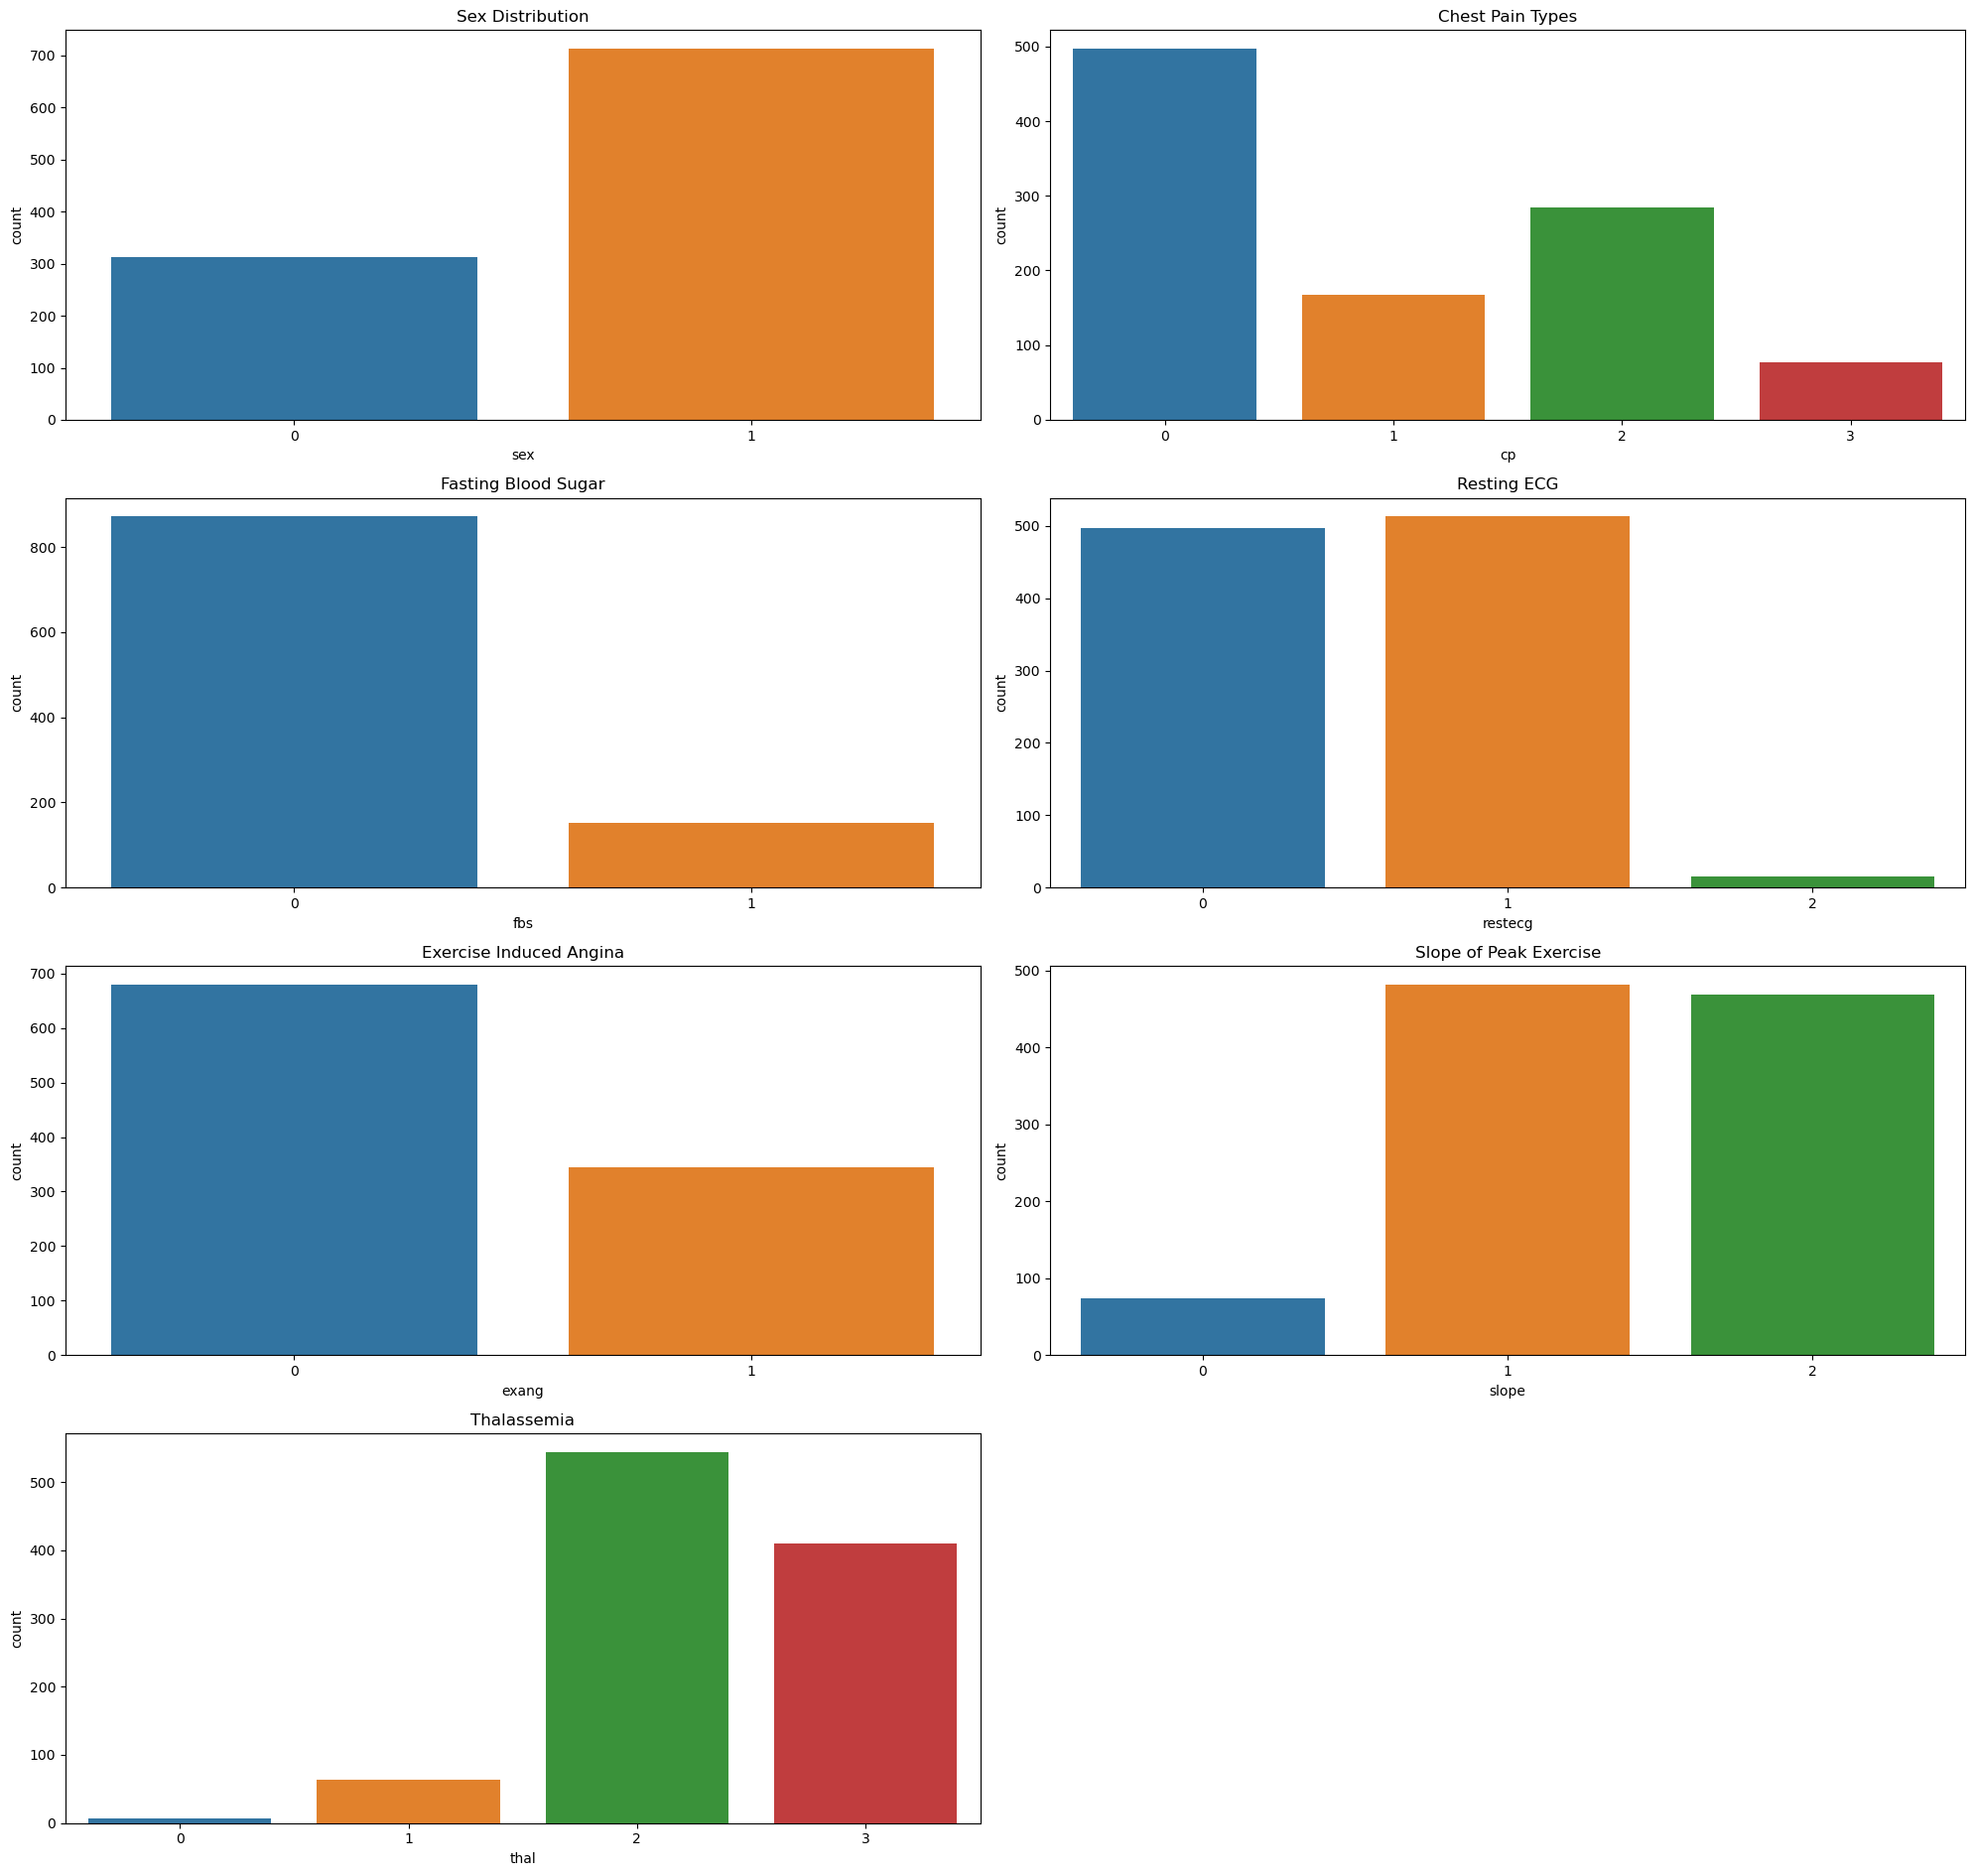

In [394]:
plt.figure(figsize=(20, 19))

# Create a grid that can accommodate 7 subplots
plt.subplot(4, 2, 1)
sns.countplot(x=df["sex"])
plt.title("Sex Distribution")

plt.subplot(4, 2, 2)
sns.countplot(x=df["cp"])
plt.title("Chest Pain Types")

plt.subplot(4, 2, 3)
sns.countplot(x=df["fbs"])
plt.title("Fasting Blood Sugar")

plt.subplot(4, 2, 4)
sns.countplot(x=df["restecg"])
plt.title("Resting ECG")

plt.subplot(4, 2, 5)
sns.countplot(x=df["exang"])
plt.title("Exercise Induced Angina")

plt.subplot(4, 2, 6)
sns.countplot(x=df["slope"])
plt.title("Slope of Peak Exercise")

plt.subplot(4, 2, 7)
sns.countplot(x=df["thal"])
plt.title("Thalassemia")


plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [395]:
pd.crosstab(df["sex"],df["cp"])

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


In [396]:
pd.crosstab(df["sex"],df["fbs"])

fbs,0,1
sex,,
0,270,42
1,602,111


In [397]:
pd.crosstab(df["sex"],df["restecg"])

restecg,0,1,2
sex,,,
0,144,157,11
1,353,356,4


In [398]:
pd.crosstab(df["sex"],df["slope"])

slope,0,1,2
sex,,,
0,17,150,145
1,57,332,324


# Data preprocessing

#### no missing value

#### no wrong data

#### retrain the outliers

#### no data type conversion

In [399]:
df = df.drop_duplicates()

# Transformation

In [400]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called df
label_encoder = LabelEncoder()
df['oldpeak'] = label_encoder.fit_transform(df['oldpeak'])

In [401]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called df
label_encoder = LabelEncoder()
df['chol'] = label_encoder.fit_transform(df['chol'])

# Encoding

### no need of encoding

# Scaling

In [402]:
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your DataFrame and you want to scale specific columns
scaler = StandardScaler()
df[['age', 'oldpeak', 'trestbps', 'chol', 'thalach']] = scaler.fit_transform(df[['age', 'oldpeak', 'trestbps', 'chol', 'thalach']])


In [403]:
# Save the Clean file

In [406]:
df.to_csv("C:/Users/Divya/clean_heart_disease.csv", index=False)

